# import

In [1]:
from Utilities.utils import *
# Get the current working directory
current_working_dir = os.path.join(Path(os.getcwd()).parent,'data') 
ed2_data_dict = load_h5(os.path.join(current_working_dir,r"ED2_data.h5"))


# figure D (& L)

In [2]:
# load data
pl_data = ed2_data_dict['DLS_DMS_lesion_learning_curves_df']
pl_data['training_levels'] = pl_data['training_levels'].apply(ast.literal_eval)

# cut trials down:
cut = 4000

DLS_mask = pl_data.type.values =='DLS'

## DLS
catagories = pl_data.catagory[DLS_mask].values
animals = pl_data.animal[DLS_mask].values
t_levels = pl_data.training_levels[DLS_mask].values
lesion_mask = catagories == 'lesion'
control_mask = catagories == 'control'

dls_c_max_l = []
dls_c_t_reached = []
for item in t_levels[control_mask]:
    dls_c_max_l = dls_c_max_l+ [max(item[0:cut])]
    dls_c_t_reached = dls_c_t_reached + [np.where(np.array(item) == max(item[0:cut]))[0][0]]
    
dls_l_max_l = []
dls_l_t_reached = []
for item in t_levels[lesion_mask]:
    dls_l_max_l = dls_l_max_l+ [max(item[0:cut])]
    dls_l_t_reached = dls_l_t_reached + [np.where(np.array(item) == max(item[0:cut]))[0][0]]

DMS_mask = pl_data.type.values =='DMS'

## DMS
catagories = pl_data.catagory[DMS_mask].values
animals = pl_data.animal[DMS_mask].values
t_levels = pl_data.training_levels[DMS_mask].values
lesion_mask = catagories == 'lesion'
control_mask = catagories == 'control'

dms_c_max_l = []
dms_c_t_reached = []
for item in t_levels[control_mask]:
    dms_c_max_l = dms_c_max_l+ [max(item[0:cut])]
    dms_c_t_reached = dms_c_t_reached + [np.where(np.array(item) == max(item[0:cut]))[0][0]]
    
dms_l_max_l = []
dms_l_t_reached = []
for item in t_levels[lesion_mask]:
    dms_l_max_l = dms_l_max_l+ [max(item[0:cut])]
    dms_l_t_reached = dms_l_t_reached + [np.where(np.array(item) == max(item[0:cut]))[0][0]]
    



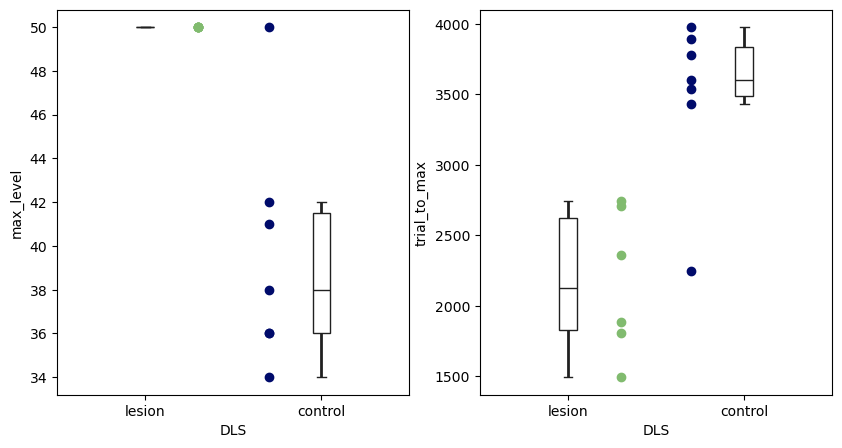

In [3]:
fig,[ax,ax1] = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot([0.3]*len(dls_c_t_reached), dls_c_t_reached,'o',color = '#81BB6F')
ax1.plot([0.7]*len(dls_l_t_reached), dls_l_t_reached,'o',color = '#000B6B')
plot_df = pd.DataFrame({'DLS': ['lesion']*len(dls_c_t_reached) + ['control']*len(dls_l_t_reached),'trial_to_max': dls_c_t_reached+dls_l_t_reached})
ax1=sns.boxplot( y = 'trial_to_max', x = 'DLS', data = plot_df, color = "#000B6B", width = .1, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax1)

ax.plot([0.3]*len(dls_c_max_l), dls_c_max_l,'o',color = '#81BB6F')
ax.plot([0.7]*len(dls_l_max_l), dls_l_max_l,'o',color = '#000B6B')
plot_df1 = pd.DataFrame({'DLS': ['lesion']*len(dls_c_max_l) + ['control']*len(dls_l_max_l),'max_level': dls_c_max_l+dls_l_max_l})
ax=sns.boxplot( y = 'max_level', x = 'DLS', data = plot_df1, color = "#000B6B", width = .1, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)


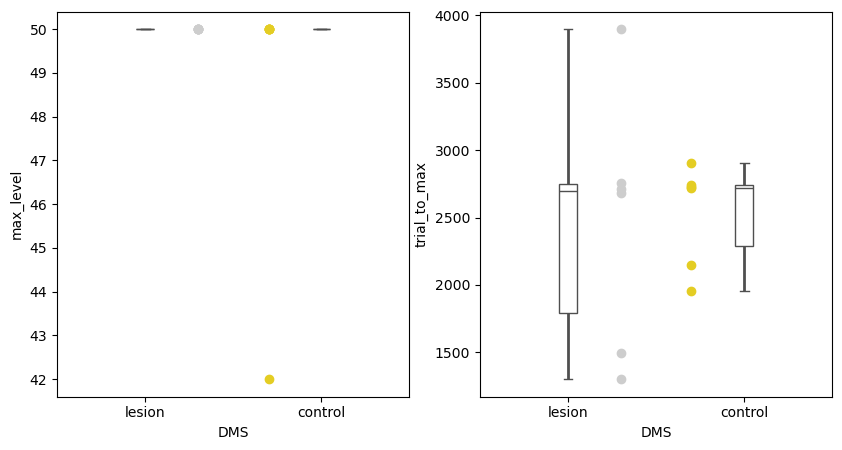

In [4]:
fig,[ax,ax1] = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot([0.3]*len(dms_c_t_reached), dms_c_t_reached,'o',color = "#CDCDCD")
ax1.plot([0.7]*len(dms_l_t_reached), dms_l_t_reached,'o',color = "#E4CD23")
plot_df2 = pd.DataFrame({'DMS': ['lesion']*len(dms_c_t_reached) + ['control']*len(dms_l_t_reached),'trial_to_max': dms_c_t_reached+dms_l_t_reached})
ax1=sns.boxplot( y = 'trial_to_max', x = 'DMS', data = plot_df2, color = "#E4CD23", width = .1, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax1)

ax.plot([0.3]*len(dms_c_max_l), dms_c_max_l,'o',color = '#CDCDCD')
ax.plot([0.7]*len(dms_l_max_l), dms_l_max_l,'o',color = '#E4CD23')
plot_df3 = pd.DataFrame({'DMS': ['lesion']*len(dms_c_max_l) + ['control']*len(dms_l_max_l),'max_level': dms_c_max_l+dms_l_max_l})
ax=sns.boxplot( y = 'max_level', x = 'DMS', data = plot_df3, color = "#E4CD23", width = .1, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)


In [5]:
dls_c_ttmax = plot_df.trial_to_max[plot_df.DLS == 'control']
dls_l_ttmax = plot_df.trial_to_max[plot_df.DLS == 'lesion']

dls_c_maxl = plot_df1.max_level[plot_df1.DLS == 'control']
dls_l_maxl = plot_df1.max_level[plot_df1.DLS == 'lesion']

dms_c_ttmax = plot_df2.trial_to_max[plot_df2.DMS == 'control']
dms_l_ttmax = plot_df2.trial_to_max[plot_df2.DMS == 'lesion']

dms_c_maxl = plot_df3.max_level[plot_df3.DMS == 'control']
dms_l_maxl = plot_df3.max_level[plot_df3.DMS == 'lesion']

# --- Combine data into one DataFrame ---
df = pd.DataFrame({
    'value': pd.concat([
        dms_c_ttmax, dms_l_ttmax,
        dms_c_maxl, dms_l_maxl,
        dls_c_ttmax, dls_l_ttmax,
        dls_c_maxl, dls_l_maxl
    ], ignore_index=True),
    'region': (['DMS'] * (len(dms_c_ttmax) + len(dms_l_ttmax)) +
               ['DMS'] * (len(dms_c_maxl) + len(dms_l_maxl)) +
               ['DLS'] * (len(dls_c_ttmax) + len(dls_l_ttmax)) +
               ['DLS'] * (len(dls_c_maxl) + len(dls_l_maxl))),
    'metric': (['trial_to_max'] * (len(dms_c_ttmax) + len(dms_l_ttmax)) +
               ['max_level'] * (len(dms_c_maxl) + len(dms_l_maxl)) +
               ['trial_to_max'] * (len(dls_c_ttmax) + len(dls_l_ttmax)) +
               ['max_level'] * (len(dls_c_maxl) + len(dls_l_maxl))),
    'group': (['control'] * len(dms_c_ttmax) +
              ['lesion'] * len(dms_l_ttmax) +
              ['control'] * len(dms_c_maxl) +
              ['lesion'] * len(dms_l_maxl) +
              ['control'] * len(dls_c_ttmax) +
              ['lesion'] * len(dls_l_ttmax) +
              ['control'] * len(dls_c_maxl) +
              ['lesion'] * len(dls_l_maxl))
})

# --- Two-way ANOVA (Region × Group) for each metric ---
for metric in df['metric'].unique():
    print(f"\n--- {metric.upper()} ---")
    sub = df[df['metric'] == metric]
    
    # Run two-way ANOVA
    aov = pg.anova(dv='value', between=['region', 'group'], data=sub, detailed=True)
    print(aov[['Source', 'F', 'p-unc', 'np2']])  # np2 = partial eta-squared (effect size)
    
    # Tukey post-hoc tests
    print("\nTukey post-hoc:")
    tukey = pairwise_tukeyhsd(sub['value'], sub['region'] + "_" + sub['group'])
    print(tukey)
    
    # Compute Cohen’s d for each pair
    print("\nEffect sizes (Cohen’s d):")
    pairs = sub.groupby(['region', 'group'])
    dms_c = sub[(sub.region == 'DMS') & (sub.group == 'control')]['value']
    dms_l = sub[(sub.region == 'DMS') & (sub.group == 'lesion')]['value']
    dls_c = sub[(sub.region == 'DLS') & (sub.group == 'control')]['value']
    dls_l = sub[(sub.region == 'DLS') & (sub.group == 'lesion')]['value']
    
    print("DMS control vs lesion:", pg.compute_effsize(dms_c, dms_l, eftype='cohen'))
    print("DLS control vs lesion:", pg.compute_effsize(dls_c, dls_l, eftype='cohen'))
    print("DMS lesion vs DLS lesion:", pg.compute_effsize(dms_l, dls_l, eftype='cohen'))



--- TRIAL_TO_MAX ---
           Source         F     p-unc       np2
0          region  1.865625  0.186428  0.081591
1           group  7.765610  0.011055  0.269962
2  region * group  6.078479  0.022384  0.224476
3        Residual       NaN       NaN       NaN

Tukey post-hoc:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1      group2    meandiff  p-adj    lower      upper   reject
---------------------------------------------------------------------
DLS_control  DLS_lesion -1327.4286 0.0065 -2322.7438 -332.1134   True
DLS_control DMS_control  -962.0952 0.0605 -1957.4104   33.2199  False
DLS_control  DMS_lesion -1020.7619 0.0431 -2016.0771  -25.4467   True
 DLS_lesion DMS_control   365.3333 0.7589   -667.554 1398.2207  False
 DLS_lesion  DMS_lesion   306.6667 0.8408  -726.2207  1339.554  False
DMS_control  DMS_lesion   -58.6667 0.9985  -1091.554  974.2207  False
---------------------------------------------------------------------

Effect sizes (Cohen’

c:\miniconda\envs\proc_replay_2025\lib\site-packages\pingouin\effsize.py:803: RuntimeWarning: invalid value encountered in scalar divide
  d = (x.mean() - y.mean()) / poolsd


# figure E

control baseline
NormaltestResult(statistic=np.float64(0.4550964930757706), pvalue=np.float64(0.7964839929753357))
control saline
NormaltestResult(statistic=np.float64(1.2423290264759466), pvalue=np.float64(0.537318358785084))
data is normally distributed
TtestResult(statistic=np.float64(-0.6309622568101675), pvalue=np.float64(0.5481049435881973), df=np.int64(7))
---------
Between-group change: Mann-Whitney p = 0.0003108003108003108
Rank-biserial r: 1.0


c:\miniconda\envs\proc_replay_2025\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)


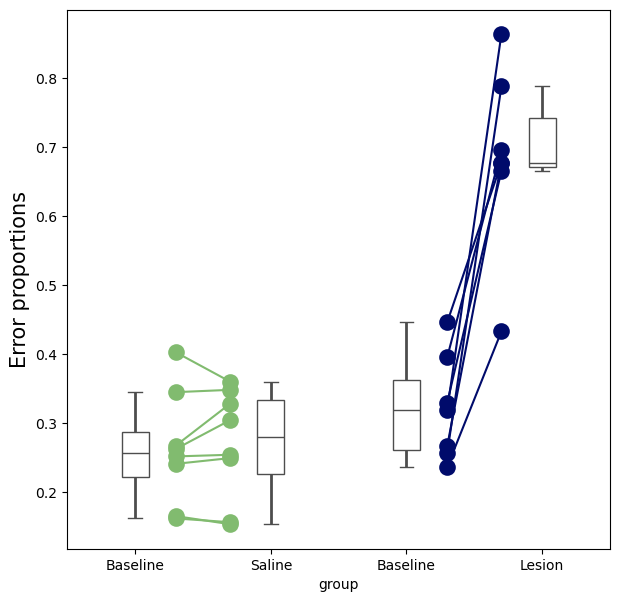

In [6]:
data_df = ed2_data_dict['lesion_data_df']
data_df['error scores'] = data_df['error scores'].apply(parse_error_list)

control_mask = data_df.type.values == 'control'
c_early_learning_mask = data_df[control_mask].Group.values == 'Early Learning'
c_pre_mask = data_df[control_mask].Group.values == 'Pre Lesion'
c_post_mask = data_df[control_mask].Group.values == 'Post Lesion'

lesion_mask = data_df.type.values == 'lesion'
l_early_learning_mask = data_df[lesion_mask].Group.values == 'Early Learning'
l_pre_mask = data_df[lesion_mask].Group.values == 'Pre Lesion'
l_post_mask = data_df[lesion_mask].Group.values == 'Post Lesion'

c_all_errors =  [l.tolist() for l in data_df[control_mask][c_early_learning_mask]['error scores'].values],[l.tolist() for l in data_df[control_mask][c_pre_mask]['error scores'].values],[l.tolist() for l in data_df[control_mask][c_post_mask]['error scores'].values]
l_all_errors =  [l.tolist() for l in data_df[lesion_mask][l_early_learning_mask]['error scores'].values],[l.tolist() for l in data_df[lesion_mask][l_pre_mask]['error scores'].values],[l.tolist() for l in data_df[lesion_mask][l_post_mask]['error scores'].values]

c_errors = extract_errors_into_df(c_all_errors)
l_errors = extract_errors_into_df(l_all_errors)


buzz = 'error'

fig, ax = plt.subplots(1, 1,figsize=(7,7))

for i in range(len(c_all_errors[0])):
    ax.plot([0.3,0.7],[c_errors[buzz][1][i],c_errors[buzz][2][i]],'o-',color = "#81BB6F", alpha = 1, markersize = 12,markeredgewidth=0)
for i in range(len(l_all_errors[0])):
    ax.plot([2.3,2.7],[l_errors[buzz][1][i],l_errors[buzz][2][i]],'o-',color = "#000B6B",alpha = 1, markersize = 12,markeredgewidth=0)
    
scores = c_errors.error[1] + c_errors.error[2] + l_errors.error[1] + l_errors.error[2]
type_ = ['c_baseline']*len(c_errors.error[1]) + ['c_saline']*len(c_errors.error[2]) + ['l_Baseline']*len(l_errors.error[1]) + ['l_lesion']*len(l_errors.error[2])
plot_df = pd.DataFrame({'group': type_, 'error_rate': scores})

ax=sns.boxplot( y = 'error_rate', x = 'group', data = plot_df, color = 'blue', width = .2, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=False, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = 'v',ax = ax)
    
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(('Baseline', 'Saline', 'Baseline', 'Lesion'), fontsize = 10)
ax.set_ylabel('Error proportions',fontsize = 15)

ax.tick_params(axis='both', which='major', labelsize=10)


cb_mask = plot_df.group == 'c_baseline'
cl_mask = plot_df.group == 'c_saline'
lb_mask = plot_df.group == 'l_Baseline'
ll_mask = plot_df.group == 'l_lesion'

#stats
print('control baseline')
print(scipy.stats.normaltest(list(plot_df.error_rate[cb_mask])))
print('control saline')
print(scipy.stats.normaltest(list(plot_df.error_rate[cl_mask])))
if (scipy.stats.normaltest(list(plot_df.error_rate[cb_mask]))[-1] > 0.5) and (scipy.stats.normaltest(list(plot_df.error_rate[cl_mask]))[-1] > 0.5):
    print('data is normally distributed')
else:
    print('data is not normally distributed')
print(scipy.stats.ttest_rel(plot_df.error_rate[cb_mask],plot_df.error_rate[cl_mask]))
print('---------')


# STATS
control_delta = np.array(c_errors.error[1]) - np.array(c_errors.error[2])
lesion_delta =np.array(l_errors.error[1]) - np.array(l_errors.error[2])
# Compare groups on change scores
u_stat, p = mannwhitneyu(control_delta, lesion_delta)
print("Between-group change: Mann-Whitney p =", p)

u_stat = min(u_stat, len(control_delta)*len(lesion_delta) - u_stat)
def rank_biserial(u, n1, n2):
    return 1 - (2 * u) / (n1 * n2)
rbr = rank_biserial(u_stat, len(control_delta), len(lesion_delta))
print("Rank-biserial r:", rbr)



# figure F

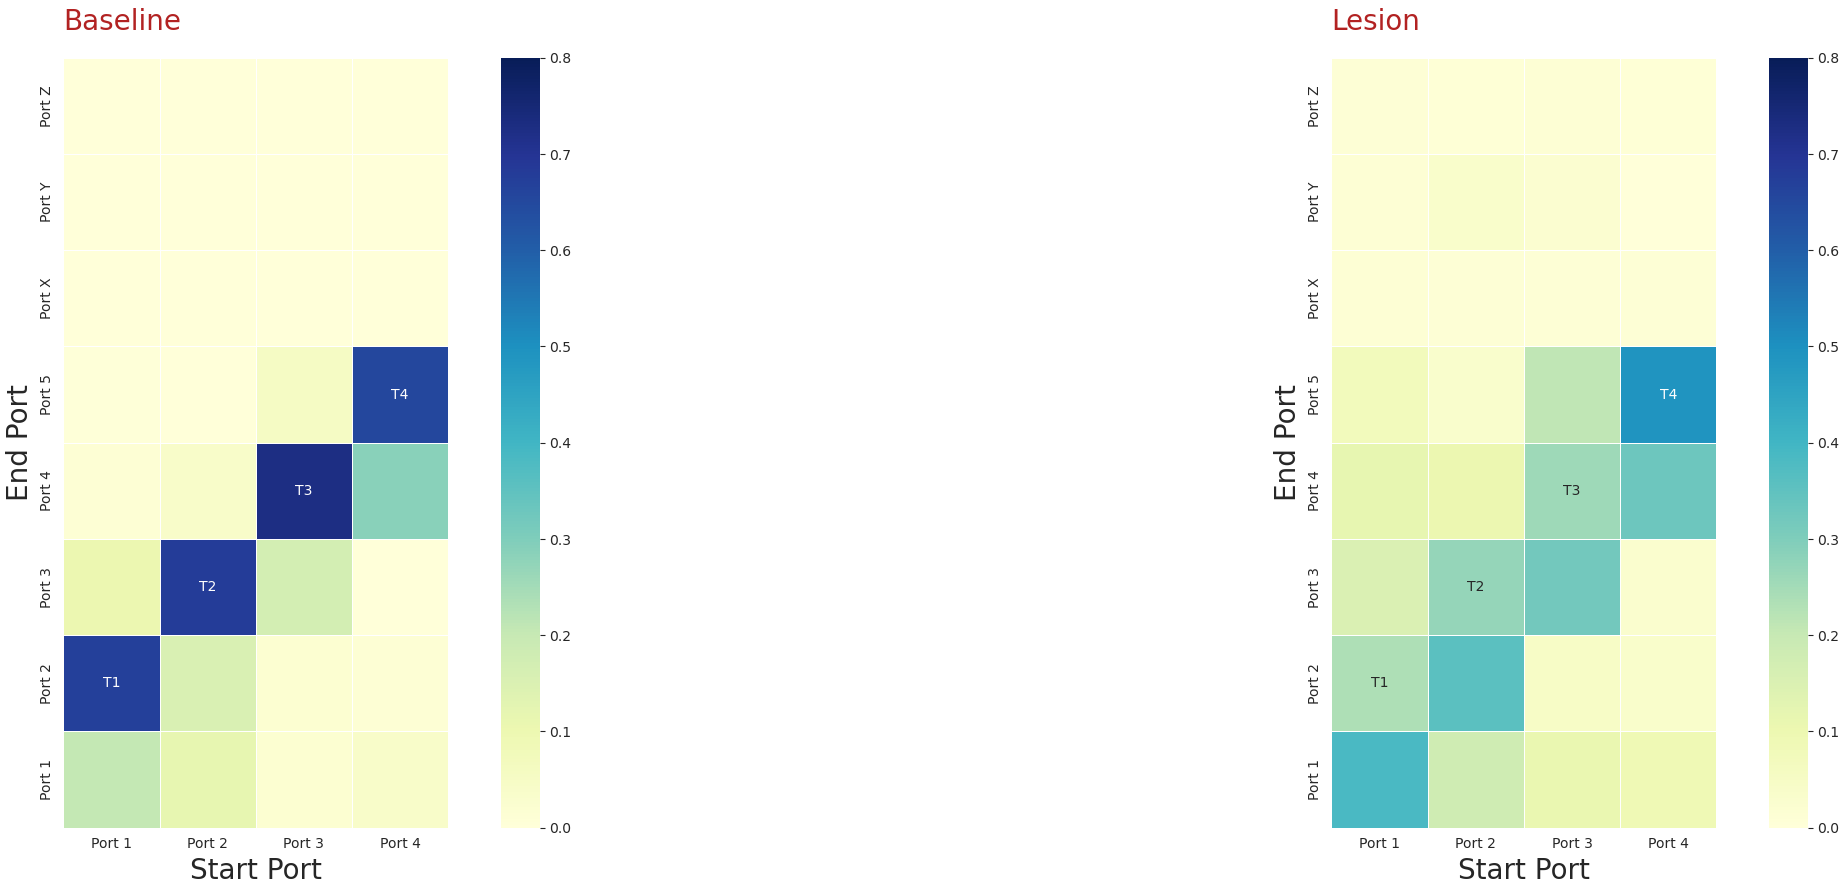

In [7]:
data_df = ed2_data_dict['lesion_data_df']

control_mask = data_df.type.values == 'control'
c_early_learning_mask = data_df[control_mask].Group.values == 'Early Learning'
c_pre_mask = data_df[control_mask].Group.values == 'Pre Lesion'
c_post_mask = data_df[control_mask].Group.values == 'Post Lesion'

lesion_mask = data_df.type.values == 'lesion'
l_early_learning_mask = data_df[lesion_mask].Group.values == 'Early Learning'
l_pre_mask = data_df[lesion_mask].Group.values == 'Pre Lesion'
l_post_mask = data_df[lesion_mask].Group.values == 'Post Lesion'

c_all_tmatrix = [data_df[control_mask][c_early_learning_mask].transition_matrix.values,data_df[control_mask][c_pre_mask].transition_matrix.values,data_df[control_mask][c_post_mask].transition_matrix.values]
l_all_tmatrix = [data_df[lesion_mask][l_early_learning_mask].transition_matrix.values,data_df[lesion_mask][l_pre_mask].transition_matrix.values,data_df[lesion_mask][l_post_mask].transition_matrix.values]


c_all_tmatrix_ = []
for arr in c_all_tmatrix:
    parsed = [ast.literal_eval(item) for item in arr]   # convert each string to list
    c_all_tmatrix_.append(parsed)
l_all_tmatrix_ = []
for arr in l_all_tmatrix:
    parsed = [ast.literal_eval(item) for item in arr]   # convert each string to list
    l_all_tmatrix_.append(parsed)


C_group_means = average_across_animals_transition_matrix(c_all_tmatrix_)
L_group_means = average_across_animals_transition_matrix(l_all_tmatrix_)


######normalise data by column:
c_means_norm = normalise_transition_matrix_means(C_group_means) 
l_means_norm = normalise_transition_matrix_means(L_group_means) 

c_max = np.max(c_means_norm)
l_max = np.max(l_means_norm)

d1 = np.array(c_means_norm[1]) - np.array(c_means_norm[2])
d2 = np.array(l_means_norm[1]) - np.array(l_means_norm[2])
d1_list = [list(d1.tolist())]
d2_list = [list(d2.tolist())]

normalised_means = c_means_norm + l_means_norm

## create mask and labels
x_axis_labels = ['Port 1','Port 2','Port 3','Port 4'] # labels for x-axis
y_axis_labels = ['Port Z','Port Y','Port X','Port 5','Port 4','Port 3','Port 2','Port 1'] # labels for y-axis
labels =  np.array([['','','',''],
                    ['','','',''],
                    ['','','',''],
                    ['','','','T4'],
                    ['','','T3',''],
                    ['','T2','',''],
                    ['T1','','',''],
                    ['','','','']])

mask = np.zeros_like(normalised_means[4])

#plot:
title = ['Baseline','Lesion']
with sns.axes_style("white"):
    nrow = 1 
    ncol = 2
    counter = 0
    fig, axs = plt.subplots(nrow, ncol,figsize=(30, 10))
    for ind, ax in enumerate(fig.axes):
        if counter < 3:
            maximum = c_max
        else:
            maximum = l_max
        h1 = sns.heatmap(normalised_means[4::][counter],xticklabels=x_axis_labels, yticklabels=y_axis_labels, 
                        linewidths=.5, mask=mask, square=True,cmap="YlGnBu",annot = labels,fmt = '',ax=ax,cbar_kws = dict(use_gridspec=False,location="right"), vmin = 0,vmax = 0.8)

        ax.set_ylabel('End Port',size = 20)
        ax.set_xlabel('Start Port',size = 20)
        ax.set_title(title[counter], loc = 'left',pad = 20,fontsize = 20,color = 'firebrick')
        counter = counter + 1
    

# figure H

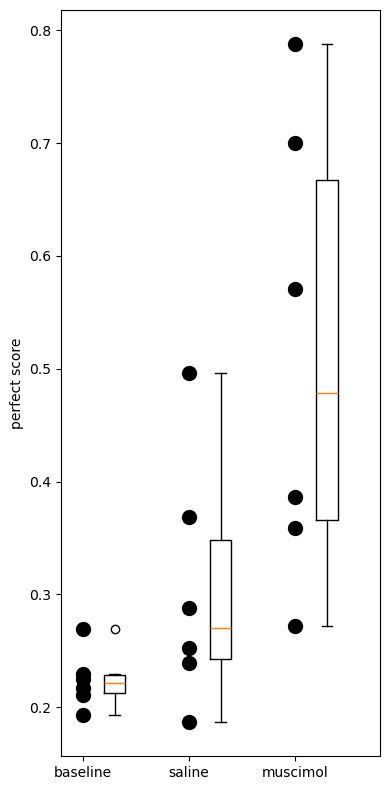

In [8]:

muscimol_error_rate_df = ed2_data_dict['muscimol_error_rate_df'].copy()
muscimol_error_rate_df['perfect score'] = [ast.literal_eval(item) for item in muscimol_error_rate_df['perfect score'].values]

# --- Plot ---
plt.figure(figsize=(4,8))
groups = ["baseline", "saline", "muscimol"]
xpos = np.arange(len(groups))

# Scatter
for i, g in enumerate(groups):
    y = muscimol_error_rate_df[muscimol_error_rate_df["experiment"] == g]["perfect score"]
    plt.plot([xpos[i]]* len(y), y, 'o',markersize = 10, color = 'k')

# Boxplots
plt.boxplot(
    [muscimol_error_rate_df[muscimol_error_rate_df["experiment"] == g]["perfect score"] for g in groups],
    positions=xpos+0.3,
    widths=0.2
)

plt.xticks(xpos, groups)
plt.ylabel("perfect score")
plt.tight_layout()
plt.show()


# figure K 

100%|██████████| 10000/10000 [00:20<00:00, 489.97it/s]


(0.0, 4000.0)

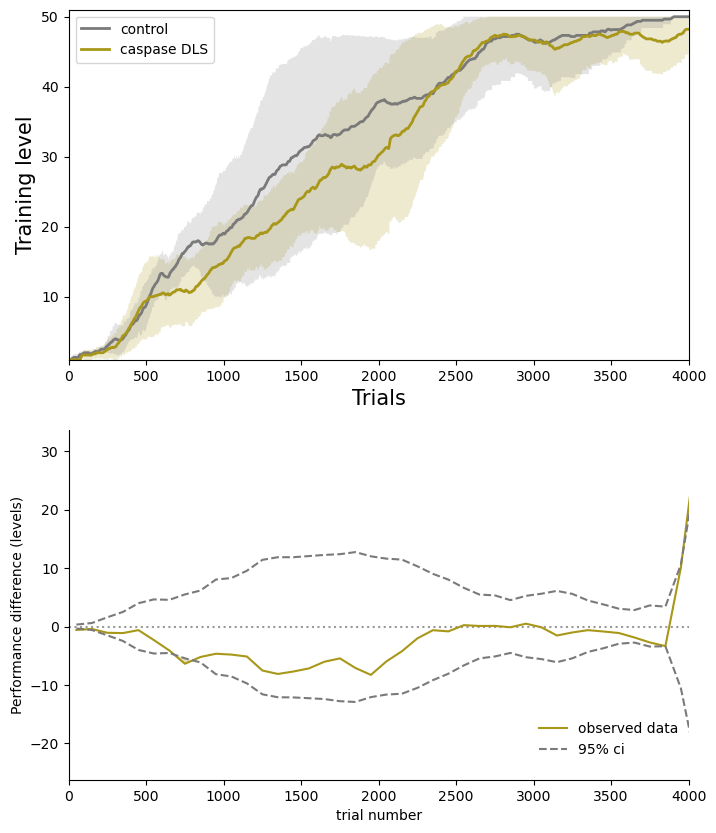

In [9]:
# 1. LOAD DATA - Read CSV
pl_data = ed2_data_dict['DLS_DMS_lesion_learning_curves_df']

# Masks
DLS_mask = pl_data.type == 'DMS'

# Extract data
categories = pl_data.catagory[DLS_mask].values
animals = pl_data.animal[DLS_mask].values
t_levels = pl_data.training_levels[DLS_mask].values

# Calculate mean and std for lesion and control groups
lesion_mask = categories == 'lesion'
lesion_MeanLearningCurve, lesion_std = calculate_mean_std(t_levels, lesion_mask)

control_mask = categories == 'control'
control_MeanLearningCurve, control_std = calculate_mean_std(t_levels, control_mask)

# Plot
%matplotlib inline
window = 10
xlim = 4000

fig, [ax,ax2] = plt.subplots(2, 1, figsize=(8, 10))
ax.set_xlim([0, xlim])
ax.set_ylim([1, 51])

ax.plot(convolve_movmean(control_MeanLearningCurve[:xlim], window), '-', color="#7A7A7A", linewidth=2,label = 'control')
ax.plot(convolve_movmean(lesion_MeanLearningCurve[:xlim], window), '-', color='#A89718', linewidth=2,label = 'caspase DLS')

ax.set_xlabel('Trials', fontsize=15)
ax.set_ylabel('Training level', fontsize=15)

fill_between_mean_std(ax, lesion_MeanLearningCurve, lesion_std, "#A89718",xlim)
fill_between_mean_std(ax, control_MeanLearningCurve, control_std, "#7A7A7A",xlim)
ax.legend()

############ PLOT 2 - obsevred vs shuffle #########

# Set cut-off for number of trials to consider
cut = 4000
# Initialize lists to store data
new, group, cum_trials, animalid = [], [], [], []
# Process each item in t_levels
for index, item in enumerate(t_levels):
    new += item[0:cut]  # Append the first 'cut' elements of the current item
    group += cut * ['lesion' if index < len(t_levels) / 2 else 'control']  # Assign group
    animalid += [animals[index]] * cut  # Append animal ID
    cum_trials += list(np.linspace(1, cut, cut))  # Generate cumulative trial numbers
# Create DataFrame with collected data
min_len = min(len(cum_trials), len(new), len(group), len(animalid))

cum_trials = cum_trials[:min_len]
new        = new[:min_len]
group      = group[:min_len]
animalid   = animalid[:min_len]

df = pd.DataFrame({
    'CumTrials': cum_trials,
    'Level': new,
    'Group': group,
    'ID': animalid
})

# Define function to generate experimental group labels
def generate_eg(list_size, prob, hue_order):
    return [hue_order[0] if random.random() < prob else hue_order[1] for _ in range(list_size)]

# define a 100-trial window to bin the data
XBIN = 100
# Bin trial indices
df["TrialIndexBinned"] = (df.CumTrials.values // XBIN) * XBIN + XBIN / 2
# Group by 'ID', 'Group', 'TrialIndexBinned' and calculate mean
df_bintr = df.groupby(['ID', 'Group', 'TrialIndexBinned']).mean().reset_index()
df_bintr['Performance'] = df_bintr.Level
hue_order = ['control', 'lesion']
# Calculate performance difference between groups
perdif_df = df_bintr[df_bintr.Group == hue_order[0]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance'] - \
            df_bintr[df_bintr.Group == hue_order[1]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance']
# Select necessary columns
df_colsel = df_bintr[['ID', 'Group', 'TrialIndexBinned', 'Performance']].copy()
# Calculate probability for experimental group
exp_gr = [df_colsel[df_colsel.ID == x].Group.unique()[0] for x in df_colsel.ID.unique()]
cb_prob = sum([x == hue_order[0] for x in exp_gr]) / len(exp_gr)

# Seed for reproducibility
np.random.seed(124321)
# Shuffle results
shuff_res = []
# Shuffle and compute performance differences
NSH = 10000
for _ in tqdm(range(NSH)):
    exp_grs = generate_eg(len(exp_gr), cb_prob,hue_order)
    egs_dict = dict(zip(df_colsel.ID.unique(), exp_grs))
    df_colsel['egs'] = df_colsel.ID.map(egs_dict)
    diff = df_colsel[df_colsel.egs == hue_order[0]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance'] - \
           df_colsel[df_colsel.egs == hue_order[1]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance']
    shuff_res.append(diff)
shrdf = pd.concat(shuff_res)

# Calculate real data performance difference
real_data = df_colsel[df_colsel.Group == hue_order[0]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance'] - \
            df_colsel[df_colsel.Group == hue_order[1]].groupby('TrialIndexBinned').mean(numeric_only=True)['Performance']
real_data *= -1

# Plot results
pos_ci = shrdf.groupby('TrialIndexBinned').quantile(.95)
neg_ci = shrdf.groupby('TrialIndexBinned').quantile(.05)

ax2.axhline(0, ls='dotted', alpha=0.4, color='k')
ax2.plot(real_data, color='#A89718', label='observed data')
ax2.plot(pos_ci, linestyle='--', color='#7A7A7A', label='95% ci')
ax2.plot(neg_ci, linestyle='--', color='#7A7A7A')

x = pos_ci.reset_index().TrialIndexBinned
y1 = neg_ci.reset_index().Performance
y2 = real_data.reset_index().Performance

ax2.fill_between(x, y1, y2, where=y2 <= y1, facecolor='#A89718', alpha=.3, interpolate=True)
ax2.set_ylabel('Performance difference (levels)')
ax2.set_xlabel('trial number')
ax2.legend(loc=(0.75, 0.05), frameon=False)
ax2 = plt.gca()
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_xlim((0, 4000))

# figure L 
see above (plotted with figure D)

# figure M

(0.0, 1000.0)

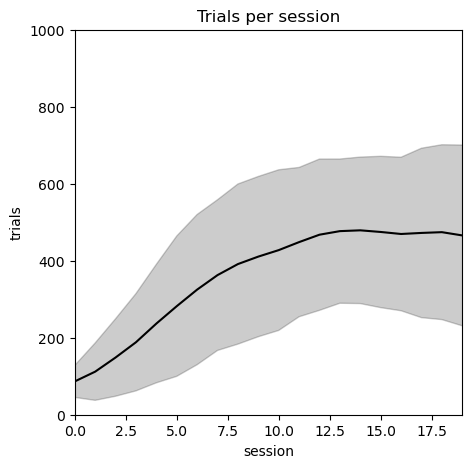

In [10]:
df = ed2_data_dict['example_learning_curves_df']

AA_trials_per_session = [ast.literal_eval(item) for item in df.trials_per_session.values]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
lesion_data = []
control_data = []

smoothing_window = 6
# Calculate and plot the mean trials
_mean = []
std_  = []
for item in conactinate_nth_items(AA_trials_per_session)[0:40]:
    _mean.append(np.mean(item))
    std_.append(np.std(item))
ax.plot(convolve_movmean(_mean,smoothing_window), color='k')

# Plot the standard deviation
ax.fill_between(range(len(_mean)), convolve_movmean(np.array(_mean) - np.array(std_),smoothing_window), convolve_movmean(np.array(_mean) + np.array(std_),smoothing_window), color='k', alpha=0.2)

# Set plot labels and limits
ax.set_title('Trials per session')
ax.set_xlabel('session')
ax.set_ylabel('trials')
ax.set_xlim(0, 19)
ax.set_ylim(0, 1000)

# figure N

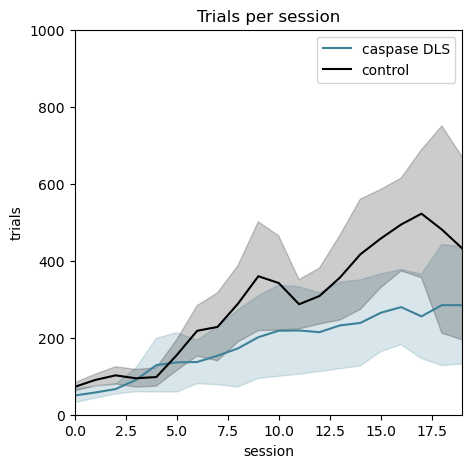

In [11]:
data = ed2_data_dict['trials_per_session_dls_df']
dls_lesion_tps = [ast.literal_eval(item) for item in data[data.group == 'dls_lesion'].trials_per_session.values]
control_lesion_tps = [ast.literal_eval(item) for item in data[data.group == 'control'].trials_per_session.values]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
smoothing_window = 2
# Calculate and plot the mean trials
_mean = []
std_  = []
for item in conactinate_nth_items(dls_lesion_tps):
    _mean.append(np.mean(item))
    std_.append(np.std(item))
ax.plot(convolve_movmean(_mean,smoothing_window), color='#3D8198',label = 'caspase DLS')
# Plot the standard deviation
ax.fill_between(range(len(_mean)), convolve_movmean(np.array(_mean) - np.array(std_),smoothing_window), convolve_movmean(np.array(_mean) + np.array(std_),smoothing_window), color="#3D8198", alpha=0.2)

# Calculate and plot the mean trials
_mean = []
std_  = []
for item in conactinate_nth_items(control_lesion_tps):
    _mean.append(np.mean(item))
    std_.append(np.std(item))
ax.plot(convolve_movmean(_mean,smoothing_window), color='k',label = 'control')
# Plot the standard deviation
ax.fill_between(range(len(_mean)), convolve_movmean(np.array(_mean) - np.array(std_),smoothing_window), convolve_movmean(np.array(_mean) + np.array(std_),smoothing_window), color='k', alpha=0.2)

# Set plot labels and limits
ax.set_title('Trials per session')
ax.set_xlabel('session')
ax.set_ylabel('trials')
ax.set_xlim(0, 19)
ax.set_ylim(0, 1000)

ax.legend()

# figure O

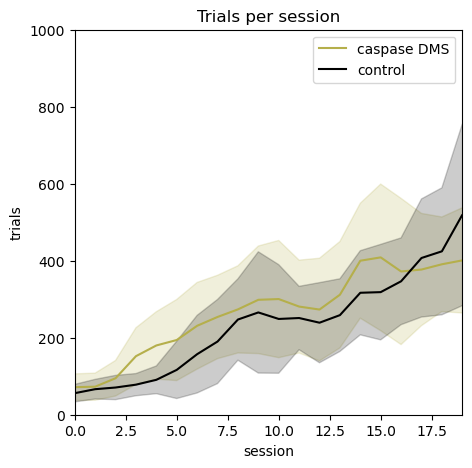

In [12]:
data = ed2_data_dict['trials_per_session_dms_df']
dms_lesion_tps = [ast.literal_eval(item) for item in data[data.group == 'dms_lesion'].trials_per_session.values]
control_lesion_tps = [ast.literal_eval(item) for item in data[data.group == 'control'].trials_per_session.values]

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
smoothing_window = 2
# Calculate and plot the mean trials
_mean = []
std_  = []
for item in conactinate_nth_items(dms_lesion_tps):
    _mean.append(np.mean(item))
    std_.append(np.std(item))
ax.plot(convolve_movmean(_mean,smoothing_window), color="#B5AF4B",label = 'caspase DMS')
# Plot the standard deviation
ax.fill_between(range(len(_mean)), convolve_movmean(np.array(_mean) - np.array(std_),smoothing_window), convolve_movmean(np.array(_mean) + np.array(std_),smoothing_window), color="#B5AF4B", alpha=0.2)

# Calculate and plot the mean trials
_mean = []
std_  = []
for item in conactinate_nth_items(control_lesion_tps):
    _mean.append(np.mean(item))
    std_.append(np.std(item))
ax.plot(convolve_movmean(_mean,smoothing_window), color='k',label = 'control')
# Plot the standard deviation
ax.fill_between(range(len(_mean)), convolve_movmean(np.array(_mean) - np.array(std_),smoothing_window), convolve_movmean(np.array(_mean) + np.array(std_),smoothing_window), color='k', alpha=0.2)

# Set plot labels and limits
ax.set_title('Trials per session')
ax.set_xlabel('session')
ax.set_ylabel('trials')
ax.set_xlim(0, 19)
ax.set_ylim(0, 1000)

ax.legend()

# figure P

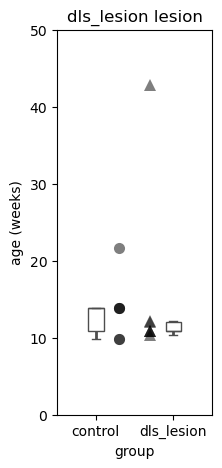

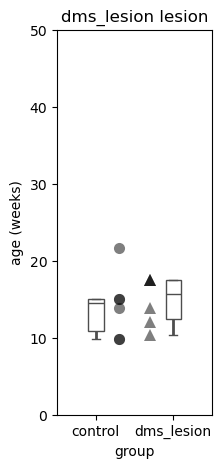

In [ ]:
dms_lesion_data = ed2_data_dict['dms_lesion_age_df'].copy()
dms_lesion_data['age_weeks'] = [ast.literal_eval(item) for item in dms_lesion_data['age_weeks'].values]

dls_lesion_data = ed2_data_dict['dls_lesion_age_df'].copy()
dls_lesion_data['age_weeks'] = [ast.literal_eval(item) for item in dls_lesion_data['age_weeks'].values]

def plot_lesion_data(lesion_data, lesion_name):
    var_str = f'{lesion_name} lesion'

    plt_df = lesion_data
    cont = plt_df.age_weeks[plt_df.group == 'control'].values
    lesi = plt_df.age_weeks[plt_df.group == lesion_name].values

    fig, ax = plt.subplots(1, 1, figsize=(2, 5))
    for i in range(len(cont)):
        ax.plot([0.3], cont[i], '--o', color='k', alpha=0.5, markeredgewidth=0, markersize=8)
    for i in range(len(lesi)):
        ax.plot([0.7], lesi[i], '--^', color='k', alpha=0.5, markeredgewidth=0, markersize=8)

    dat = list(cont) + list(lesi)
    groups = ['control'] * len(cont) + [lesion_name] * len(lesi)
    plt_df = pd.DataFrame({'group': groups, 'age (weeks)': dat})
    ax = sns.boxplot(y='age (weeks)', x='group', data=plt_df, color='blue', width=.2, zorder=10,
                     showcaps=True, boxprops={'facecolor': 'none', "zorder": 10},
                     showfliers=False, whiskerprops={'linewidth': 2, "zorder": 10},
                     saturation=1, orient='v')

    ax.set_title(var_str)
    
    ax.set_ylim(0,50)

plot_lesion_data(dls_lesion_data, 'dls_lesion')
plot_lesion_data(dms_lesion_data, 'dms_lesion')

